# Supervised Machine Learning, Part 1

## Linear Regression

In linear regression, the aim is to predict a continuous varibale (meaning a numerical value, as opposed to a class) using a set of input variables. To train our model, we need to provide a **labeled dataset**. This labeled dataset contains explanatory variables (the variables used to predict the value) as well as the dependent variables (the true value). The algorihm tries to find a line, that best matches the true values.

### Task 1

Try to fit a linear regression to the data. Show the correlation between the variables `bill_length_mm` and `bill_depth_mm` (`bill_depth_mm` is the dependent variable). You can use the function `sns.lmplot` to achieve this. \

Do you see anything interesting? Are there other aspects of the data you would like to investigate?

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  


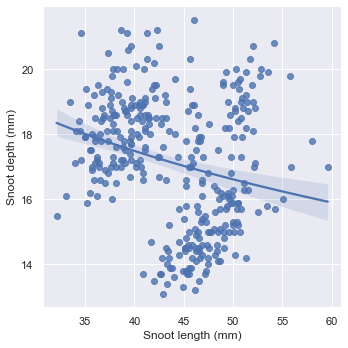

In [15]:
import seaborn as sns
sns.set_theme()
# %matplotlib widget

# Load the penguins dataset
penguins = sns.load_dataset("penguins")
print(penguins.head())
# Plot relation of snoot lenght and depth depending on species
g = sns.lmplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm",
    height=5,
    # lowess=True
    logx=True
)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Snoot length (mm)", "Snoot depth (mm)")

Same data, split up by species:

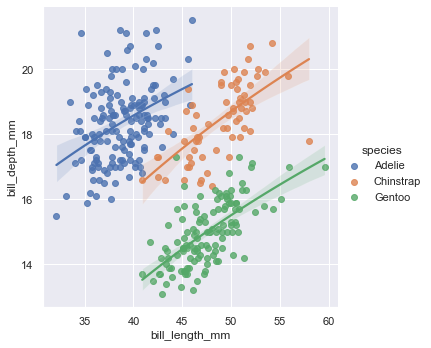

In [16]:
# Plot relation of snoot lenght and depth depending on species
# the parameter "hue" automatically colours datapoints by this variable, 
# and the lmplot function performs multiple linear regression with the "hue" parameter as the dependent variable.  
g = sns.lmplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="species",  
    height=5,
    logx=True
)

## Support Vector Machines


[Documentation](https://scikit-learn.org/stable/modules/svm.html)

In [17]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
import pandas as pd
cancer=datasets.load_breast_cancer()

X = cancer.data
y = cancer.target

# print the cancer data features (top 5 records)
print(X[:5])
# print the cancer labels (0:malignant, 1:benign)
print(y[:5])

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01 2.839e-01 2.414

In [18]:
from sklearn.model_selection import train_test_split

#split data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

#train the SVC classifier
clf = svm.SVC(kernel= "linear")
clf.fit(X_train,y_train)


SVC(kernel='linear')

In [19]:
#predict labels on the test data using our classifier
y_pred = clf.predict(X_test)

In [20]:
from sklearn.metrics import classification_report, confusion_matrix 

#compare our predictions to the true labels
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Confusion Matrix:
 [[48  5]
 [ 2 88]]
              precision    recall  f1-score   support

           0       0.96      0.91      0.93        53
           1       0.95      0.98      0.96        90

    accuracy                           0.95       143
   macro avg       0.95      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143



In [21]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# plt.figure(figsize=(10, 8))
# # Plotting our two-features-space
# sns.scatterplot(x=X_test.iloc[:, 0], 
#                 y=X_test.iloc[:, 1], 
#                 hue=y_pred, 
#                 s=20);

# print(clf.coef_)
# # Constructing a hyperplane using a formula.
# w = clf.coef_[0]           # w consists of 2 elements
# b = clf.intercept_[0]      # b consists of 1 element
# x_points = np.linspace(-1, 1)    # generating x-points from -1 to 1
# y_points = -(w[0] / w[1]) * x_points - b / w[1]  # getting corresponding y-points
# # # Plotting a red hyperplane
# # plt.plot(x_points, y_points, c='r');

SVC(kernel='linear', random_state=32)

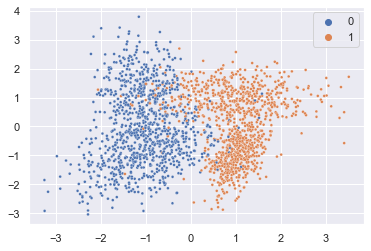

In [22]:
import numpy as np
from sklearn.svm import SVC
from sklearn.datasets import make_classification
# Creating a random dataset of 2,000 samples and only 2 features
# (for 2–dimensional space). And yeah, it's a binary classification
# here (`y` contains two classes: 0 and 1).
X, y = make_classification(n_samples=2000, n_features=2,
                           n_informative=2, n_redundant=0,
                           n_classes=2,
                           random_state=32)
sns.scatterplot(x=X[:, 0], 
                y=X[:, 1], 
                hue=y, 
                s=8);
# Splitting our dataset by train and test parts.
# `stratify` is here to make our splitting balanced
# in terms of classes.
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                   test_size=0.3, stratify=y,
                                   random_state=32)
# And here we train our model. IMPORTANT: we use kernel='linear'.
svc_model = SVC(kernel='linear', random_state=32)
svc_model.fit(X_train, y_train)

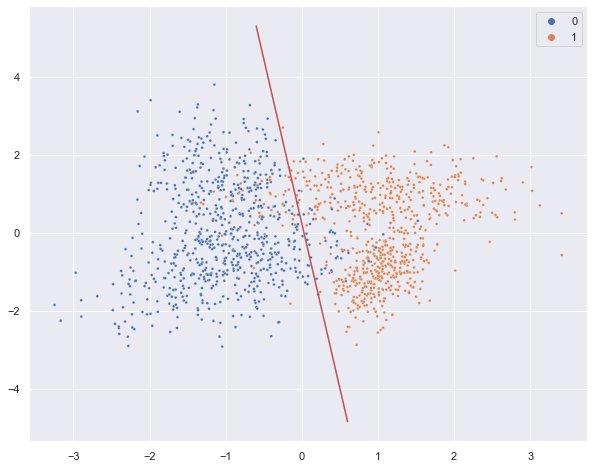

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))
# Plotting our two-features-space
sns.scatterplot(x=X_train[:, 0], 
                y=X_train[:, 1], 
                hue=y_train, 
                s=8);
# Constructing a hyperplane using a formula.
w = svc_model.coef_[0]           # w consists of 2 elements
b = svc_model.intercept_[0]      # b consists of 1 element
x_points = np.linspace(-0.6,0.6)    # generating x-points from -1 to 1
y_points = -(w[0] / w[1]) * x_points - b / w[1]  # getting corresponding y-points
# Plotting a red hyperplane
plt.plot(x_points, y_points, c='r');